In [5]:
import sys
import os
import logging
 
# Add the project root directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
from src.playstore_scraper import PlayStoreScraper
from src.review_preprocessor import ReviewPreprocessor
import pandas as pd
import logging
%reload_ext autoreload
%autoreload 2 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.sentiment_analyzer import SentimentAnalyzer
from src.theme_analyzer import ThemeAnalyzer


In [7]:
from src.review_preprocessor import ReviewPreprocessor

preprocessor = ReviewPreprocessor()
preprocessor.process_all_banks()

2025-06-11 21:32:28,906 - INFO - Saved 596 processed reviews for boe
2025-06-11 21:32:28,997 - INFO - Saved 600 processed reviews for cbe
2025-06-11 21:32:29,048 - INFO - Saved 408 processed reviews for dashen


In [8]:
analyzed_data = pd.read_csv('../data/analyzed_reviews.csv')

analyzed_data.head()

,review_text,rating,date,bank_name,source,sentiment_label,sentiment_score,keywords
0,"I have a fitayah account, a type of interest f...",1,2024-02-18,boe,google_play,NEGATIVE,0.999777,fitayah account type interest account system p...
1,Can you please just make it functional. I dont...,1,2024-04-15,boe,google_play,NEGATIVE,0.928859,functionality works aestheticaly nice loading ...
2,Developers the company takes too long to updat...,2,2024-05-03,boe,google_play,NEGATIVE,0.999800,developers company app process app money accou...
3,This app is a joke. It crashes more than it wo...,1,2025-05-21,boe,google_play,NEGATIVE,0.999194,app joke features point money balance develope...
4,"Hello, Im facing a problem with the BOA Mobile...",1,2025-06-03,boe,google_play,NEGATIVE,0.999369,problem boa mobile app time phone number passw...


Device set to use cpu
2025-06-11 21:33:33,444 - INFO - Sentiment analyzer initialized successfully



Sentiment Analysis Summary:
---------------------------
Total reviews analyzed: 1604

Sentiment distribution:
sentiment_label
NEGATIVE    1001
POSITIVE     603
Name: count, dtype: int64


Text(0, 0.5, 'Number of Reviews')

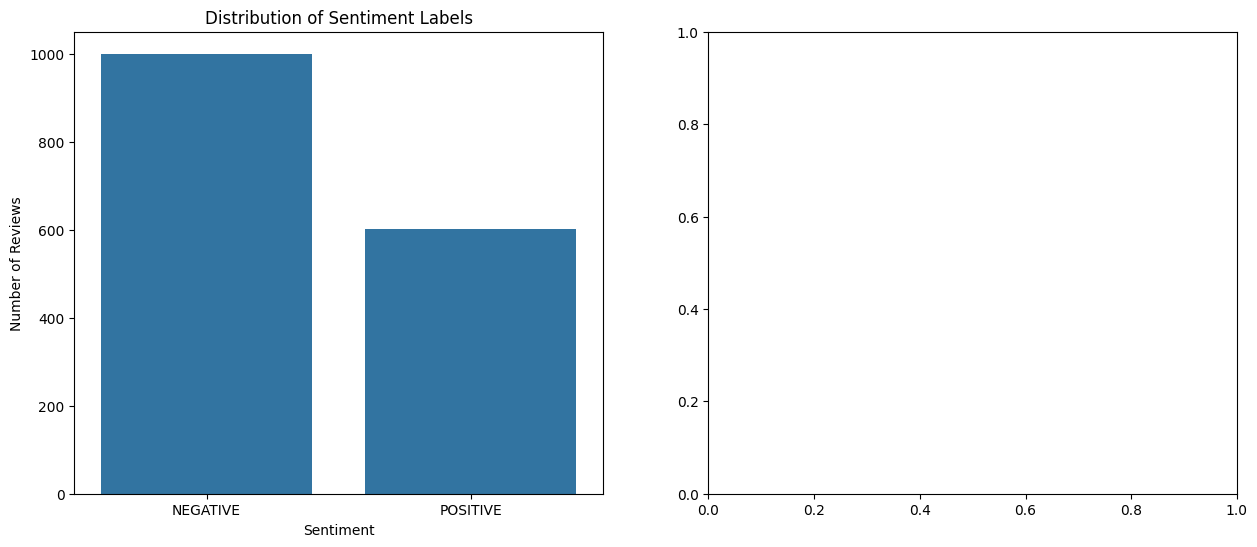

In [9]:
# Initialize sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()

# Load processed reviews
preprocessor = ReviewPreprocessor()
df = preprocessor.load_data()

# Analyze sentiment for all reviews
df_with_sentiment, agg_sentiment = sentiment_analyzer.analyze_reviews(df)

# Display summary of sentiment analysis
print("\nSentiment Analysis Summary:")
print("---------------------------")
print(f"Total reviews analyzed: {len(df_with_sentiment)}")
print("\nSentiment distribution:")
print(df_with_sentiment['sentiment_label'].value_counts())
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Sentiment Distribution
sentiment_counts = df_with_sentiment['sentiment_label'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=ax1)
ax1.set_title('Distribution of Sentiment Labels')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Reviews')







## Sentiment Categories:
- There are two sentiment categories: NEGATIVE and POSITIVE.
- Distribution:
   - The bar for NEGATIVE sentiment is significantly taller than that for POSITIVE sentiment, indicating that there are more negative reviews in the dataset.
   - Approximately 1000 reviews are classified as NEGATIVE, while POSITIVE reviews are around 200.
- Implications:
   - The large number of negative reviews suggests that users may have significant issues or dissatisfaction with the product or service being analyzed.
   - This could indicate areas for improvement or highlight potential problems that need addressing.

In [ ]:
# Display average sentiment scores by bank
print("\nAverage sentiment scores by bank:")
print(agg_sentiment.groupby('bank_name').mean())



Average sentiment scores by bank:
bank_name
boe       0.975121
cbe       0.973501
dashen    0.981897
Name: sentiment_score, dtype: float64


<Figure size 640x480 with 0 Axes>

2025-06-09 07:04:48,753 - INFO - Theme analyzer initialized successfully



Theme Analysis Summary:
----------------------

boe:
  Transaction: money, transaction
  UI/UX: app, application, banking app, apps
  Support: service
  Performance: error

cbe:
  Account Access: account
  Transaction: transaction, transactions, money, transfer
  UI/UX: app, application
  Performance: error

dashen:
  Account Access: account
  Transaction: transactions, transaction
  UI/UX: app, application, super app, banking app
  Support: services


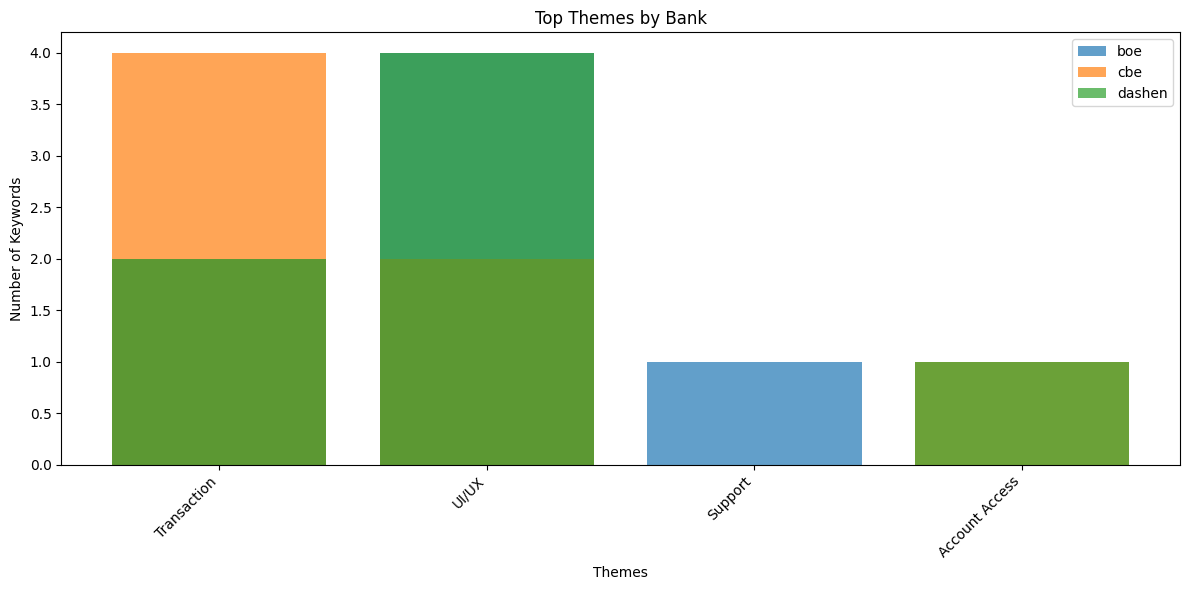

In [12]:
# Initialize theme analyzer
theme_analyzer = ThemeAnalyzer()

# Analyze themes for all reviews
themes_by_bank = theme_analyzer.identify_themes(df_with_sentiment)

# Display theme analysis summary
print("\nTheme Analysis Summary:")
print("----------------------")
for bank, themes in themes_by_bank.items():
    print(f"\n{bank}:")
    for theme, keywords in themes.items():
        print(f"  {theme}: {', '.join(keywords[:5])}")

# Visualize top themes by bank
plt.figure(figsize=(12, 6))
for bank, themes in themes_by_bank.items():
    # Get top 3 themes for each bank
    top_themes = list(themes.keys())[:3]
    theme_counts = [len(keywords) for keywords in themes.values()][:3]
    
    plt.bar(top_themes, theme_counts, label=bank, alpha=0.7)

plt.title('Top Themes by Bank')
plt.xlabel('Themes')
plt.ylabel('Number of Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
